In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import datetime


In [3]:
import glob
import pandas as pd
from datetime import datetime

base_path = "C:/Users/Admin/Desktop/KAMRUL/doi_10.5061_dryad.5hqbzkh6f__v6/Stress_dataset/"
nurses = ["5C", "6B","6D", "7A", "7E", "8B", "15","83","94","BG","CE","DF","E4", "EG","F5"]  

# Process data for each nurse and store in separate lists
nurse_data = {}

for nurse in nurses:
    path = f"{base_path}{nurse}/*"
    nurse_data[nurse] = []
    for fname in glob.glob(path):
        arr = []
        for ff in glob.glob(fname + '/*.csv'):
            if ff[len(ff) - 5] == 's' or ff[len(ff) - 5] == 'I' or ff[len(ff) - 5] == 'C':
                continue
            df = pd.read_csv(ff)
            dt = datetime.fromtimestamp(float(df.columns[0]))
            dt = dt.strftime('%Y-%m-%d')
            df = df[1:]
            
            # Calculate mean, min, max, and std for each row
            avg_values = df.mean().tolist()
            min_values = df.min().tolist()
            max_values = df.max().tolist()
            std_values = df.std().tolist()
            
            # Append these statistics to the arr list
            arr.extend(avg_values + min_values + max_values + std_values)
            
        arr.append(dt)
        arr.append(nurse)
        nurse_data[nurse].append(arr)

# Define column names for the new features
new_columns = (
    ['avg_bvp', 'avg_eda', 'avg_hr', 'avg_temp'] +
    ['min_bvp', 'min_eda', 'min_hr', 'min_temp'] +
    ['max_bvp', 'max_eda', 'max_hr', 'max_temp'] +
    ['std_bvp', 'std_eda', 'std_hr', 'std_temp']
)

# Convert nurse data into DataFrames
nurse_dfs = {}

for nurse, data in nurse_data.items():
    df = pd.DataFrame(data, columns=new_columns + ['date', 'ID'])
    nurse_dfs[nurse] = df





In [4]:
nurse_dfs["5C"]


,avg_bvp,avg_eda,avg_hr,avg_temp,min_bvp,min_eda,min_hr,min_temp,max_bvp,max_eda,max_hr,max_temp,std_bvp,std_eda,std_hr,std_temp,date,ID
0,0.000312,-733.73,477.71,106.132351,0.247902,0.0,0.827640,0.118483,84.159730,74.40,121.00,7.483068,31.965000,31.75,32.21,0.131884,2020-04-14,5C
1,-0.000183,-801.12,803.11,32.472791,4.251041,0.0,26.437712,5.850946,92.904524,54.50,135.70,12.825151,35.105830,31.35,36.75,1.209960,2020-04-14,5C
2,0.000080,-445.21,479.34,23.554277,1.350622,0.0,4.079803,0.580875,93.023808,51.00,164.97,15.782335,27.199714,23.51,29.05,0.884767,2020-04-19,5C
3,0.000230,-434.31,355.76,10.251350,1.208322,0.0,1.696611,0.076066,92.722787,56.98,132.12,14.802650,26.498081,26.25,27.13,0.168967,2020-04-19,5C
4,-0.020214,-438.51,363.79,73.504432,0.015269,0.0,0.039709,0.008793,65.672188,57.09,84.00,8.914304,26.874000,26.75,26.99,0.071526,2020-04-20,5C
5,0.000005,-430.03,499.08,14.181059,0.221155,0.0,1.618462,0.154332,95.177252,57.00,193.07,18.220122,27.111074,24.29,28.51,0.645647,2020-04-22,5C
6,-0.004882,-426.56,321.51,27.537749,0.694355,0.0,0.934132,0.063701,83.088047,57.80,99.53,8.794746,26.587759,26.49,26.69,0.059816,2020-04-22,5C
7,-0.000020,-436.53,459.17,17.358257,0.622391,0.0,1.165997,0.066382,92.977596,56.00,171.38,18.536070,27.127226,26.55,27.57,0.245882,2020-04-22,5C
8,-0.000778,-427.68,340.52,14.763049,0.087957,0.0,0.224192,0.050159,85.926725,62.70,116.20,11.804468,27.754771,27.55,28.07,0.133348,2020-04-23,5C
9,-0.000026,-425.07,554.02,17.146010,0.151936,0.0,0.938032,0.194925,90.605106,51.00,168.58,17.383463,26.533774,25.17,27.89,0.691352,2020-04-23,5C


In [5]:
nurse_dfs["6B"]
nurse_dfs["6D"]
nurse_dfs["7A"]
nurse_dfs["7E"]
nurse_dfs["8B"]
nurse_dfs["15"]
nurse_dfs["83"]
nurse_dfs["94"]
nurse_dfs["BG"]
nurse_dfs["CE"]
nurse_dfs["DF"]
nurse_dfs["E4"]
nurse_dfs["EG"]
nurse_dfs["F5"]

,avg_bvp,avg_eda,avg_hr,avg_temp,min_bvp,min_eda,min_hr,min_temp,max_bvp,max_eda,max_hr,max_temp,std_bvp,std_eda,std_hr,std_temp,date,ID
0,0.000077,-900.78,744.51,56.625233,3.907853,0.0,14.745278,3.727970,88.538284,58.00,129.80,9.552786,34.067287,32.34,35.50,0.905316,2020-07-07,F5
1,-0.172411,-1525.37,1540.80,174.478729,3.794267,0.0,10.053512,2.498279,92.743542,64.00,133.43,15.147331,34.723300,33.81,35.21,0.279246,2020-07-08,F5
2,0.003898,-1913.79,1357.27,108.522914,0.631730,0.0,8.055391,1.492121,89.392673,72.33,126.90,9.724375,34.448438,32.84,35.63,0.581994,2020-07-08,F5
3,-0.000934,-1781.07,1747.28,96.248583,0.207261,0.0,4.899130,0.527741,80.261371,57.27,153.38,11.828479,32.030056,28.63,34.97,1.708468,2020-07-08,F5
4,0.000554,-1567.84,1487.05,92.360478,0.115166,0.0,2.031602,0.182546,88.450913,61.62,131.95,12.454240,29.607497,27.19,31.49,0.976644,2020-07-08,F5
5,0.000144,-1943.23,1639.63,71.934968,0.257787,0.0,6.513055,0.691555,81.540028,52.50,133.82,10.080643,33.170834,31.07,34.99,1.045883,2020-07-10,F5
6,-0.009821,-1023.17,691.07,74.064151,0.033386,0.0,0.103700,0.028003,92.915563,62.00,130.43,14.569070,31.362481,30.99,32.07,0.197984,2020-07-10,F5
7,-0.000660,-2850.84,3384.17,98.830571,0.128156,0.0,2.838400,0.276025,85.039023,53.43,137.35,13.039151,33.033039,30.69,34.81,0.913617,2020-07-10,F5
8,-0.000141,-2256.83,2097.65,108.881905,0.211236,0.0,4.049191,0.413997,82.746287,55.43,149.48,12.177807,31.891427,28.87,34.66,1.217842,2020-07-13,F5
9,-0.000627,-781.88,726.70,44.796479,0.597622,0.0,4.014616,0.777102,92.613375,49.00,114.93,9.148679,31.248790,29.79,33.23,1.095447,2020-07-13,F5


In [6]:

# Concatenate all nurses data
combined_df = pd.concat([nurse_dfs["5C"], nurse_dfs["6B"], nurse_dfs["6D"], nurse_dfs["7A"], nurse_dfs["7E"],nurse_dfs["8B"], nurse_dfs["15"], nurse_dfs["83"], nurse_dfs["94"], nurse_dfs["BG"], nurse_dfs["CE"],nurse_dfs["DF"], nurse_dfs["E4"], nurse_dfs["EG"],nurse_dfs["F5"]], ignore_index=True)

# Print the combined DataFrame
combined_df



,avg_bvp,avg_eda,avg_hr,avg_temp,min_bvp,min_eda,min_hr,min_temp,max_bvp,max_eda,max_hr,max_temp,std_bvp,std_eda,std_hr,std_temp,date,ID
0,0.000312,-733.73,477.71,106.132351,0.247902,0.0,0.827640,0.118483,84.159730,74.40,121.00,7.483068,31.965000,31.75,32.21,0.131884,2020-04-14,5C
1,-0.000183,-801.12,803.11,32.472791,4.251041,0.0,26.437712,5.850946,92.904524,54.50,135.70,12.825151,35.105830,31.35,36.75,1.209960,2020-04-14,5C
2,0.000080,-445.21,479.34,23.554277,1.350622,0.0,4.079803,0.580875,93.023808,51.00,164.97,15.782335,27.199714,23.51,29.05,0.884767,2020-04-19,5C
3,0.000230,-434.31,355.76,10.251350,1.208322,0.0,1.696611,0.076066,92.722787,56.98,132.12,14.802650,26.498081,26.25,27.13,0.168967,2020-04-19,5C
4,-0.020214,-438.51,363.79,73.504432,0.015269,0.0,0.039709,0.008793,65.672188,57.09,84.00,8.914304,26.874000,26.75,26.99,0.071526,2020-04-20,5C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,-0.001693,-557.44,439.57,50.175282,0.074447,0.0,0.632597,0.070814,82.105895,60.43,109.58,11.111498,32.265835,31.83,32.53,0.149816,2020-07-22,F5
605,0.000429,-2331.27,2386.34,67.200858,0.099444,0.0,1.747873,0.127050,87.729397,61.50,136.38,11.561610,30.452597,27.51,33.41,1.365011,2020-07-22,F5
606,0.017579,-554.59,406.07,73.877875,0.083522,0.0,0.163951,0.041026,74.941275,50.43,90.90,11.382366,34.426273,34.21,34.71,0.124435,2020-07-23,F5
607,-0.000159,-1258.02,736.40,48.820458,0.602324,0.0,10.405429,1.266366,84.678587,63.93,164.85,11.749640,33.258628,29.49,35.50,1.492679,2020-07-23,F5


In [7]:

 # Save the DataFrame as a CSV file and download it
combined_df.to_csv("combined_nurse_data.csv", index=False)

# Print a message after saving the CSV files
print("CSV files saved and downloaded!")

CSV files saved and downloaded!


In [8]:
# Read the dataset
df = pd.read_csv("C:/Users/Admin/Desktop/KAMRUL/doi_10.5061_dryad.5hqbzkh6f__v6/combined_nurse_data.csv")


In [9]:
# Display the first few rows of the dataset
df.head()


,avg_bvp,avg_eda,avg_hr,avg_temp,min_bvp,min_eda,min_hr,min_temp,max_bvp,max_eda,max_hr,max_temp,std_bvp,std_eda,std_hr,std_temp,date,ID
0,0.000312,-733.73,477.71,106.132351,0.247902,0,0.827640,0.118483,84.159730,74.40,121.00,7.483068,31.965000,31.75,32.21,0.131884,14/04/2020,5C
1,-0.000183,-801.12,803.11,32.472791,4.251041,0,26.437712,5.850946,92.904524,54.50,135.70,12.825151,35.105830,31.35,36.75,1.209960,14/04/2020,5C
2,0.000080,-445.21,479.34,23.554277,1.350622,0,4.079803,0.580875,93.023808,51.00,164.97,15.782335,27.199714,23.51,29.05,0.884767,19/04/2020,5C
3,0.000230,-434.31,355.76,10.251350,1.208322,0,1.696611,0.076066,92.722787,56.98,132.12,14.802650,26.498081,26.25,27.13,0.168967,19/04/2020,5C
4,-0.020214,-438.51,363.79,73.504432,0.015269,0,0.039709,0.008793,65.672188,57.09,84.00,8.914304,26.874000,26.75,26.99,0.071526,20/04/2020,5C


In [10]:
# Check the summary statistics
print(df.describe())

          avg_bvp      avg_eda       avg_hr    avg_temp     min_bvp  min_eda  \
count  609.000000   609.000000   609.000000  609.000000  609.000000    609.0   
mean    -0.009589 -1398.561954  1319.733514   95.377260    1.243236      0.0   
std      0.403556   763.843067   800.240590   51.507383    2.055587      0.0   
min     -4.596430 -3536.880000   226.990000    4.640324    0.000000      0.0   
25%     -0.001987 -2039.660000   664.330000   52.779956    0.159443      0.0   
50%      0.000005 -1225.530000  1170.110000   88.844607    0.465053      0.0   
75%      0.001542  -721.530000  1901.750000  136.439897    1.394485      0.0   
max      6.198768  -345.620000  3779.200000  286.778480   16.583154      0.0   

           min_hr    min_temp     max_bvp     max_eda      max_hr    max_temp  \
count  609.000000  609.000000  609.000000  609.000000  609.000000  609.000000   
mean     6.076197    1.005333   85.148509   58.199048  128.278654   11.847726   
std      8.574683    1.630654    9.7

In [11]:
# Check for missing values
print(df.isnull().sum())

avg_bvp     0
avg_eda     0
avg_hr      0
avg_temp    0
min_bvp     0
min_eda     0
min_hr      0
min_temp    0
max_bvp     0
max_eda     0
max_hr      0
max_temp    0
std_bvp     0
std_eda     0
std_hr      0
std_temp    0
date        0
ID          0
dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
numeric_cols = ["avg_bvp", "avg_eda", "avg_hr", "avg_temp", "min_bvp", "min_eda","min_hr","min_temp", "max_bvp","max_eda","max_hr","max_temp","std_bvp","std_eda","std_hr","std_temp" ]  # List all numerical column names
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Apply log transformation to ensure non-negative values
df[numeric_cols] = df[numeric_cols].applymap(lambda x: np.log(x + abs(df[numeric_cols].min().min()) + 1))

In [13]:
df

,avg_bvp,avg_eda,avg_hr,avg_temp,min_bvp,min_eda,min_hr,min_temp,max_bvp,max_eda,max_hr,max_temp,std_bvp,std_eda,std_hr,std_temp,date,ID
0,2.517694,2.583734,2.426777,2.532457,2.475766,2.515712,2.464943,2.470732,2.507460,2.692341,2.495325,2.447325,2.518732,2.569078,2.482009,2.423279,14/04/2020,5C
1,2.517595,2.577046,2.462090,2.411721,2.627552,2.515712,2.691377,2.731079,2.578183,2.470600,2.536079,2.530406,2.610576,2.560083,2.611756,2.569807,14/04/2020,5C
2,2.517648,2.611873,2.426957,2.396061,2.519928,2.515712,2.496703,2.494436,2.579114,2.425956,2.612592,2.573592,2.360972,2.365175,2.380608,2.527824,19/04/2020,5C
3,2.517678,2.612920,2.413215,2.372238,2.514337,2.515712,2.473529,2.468529,2.576763,2.501068,2.526306,2.559491,2.335489,2.437691,2.313568,2.428692,19/04/2020,5C
4,2.513580,2.612517,2.414114,2.480766,2.466195,2.515712,2.457094,2.465026,2.339121,2.502399,2.384732,2.470269,2.349223,2.450375,2.308499,2.414405,20/04/2020,5C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,2.517293,2.601021,2.422556,2.442096,2.468638,2.515712,2.463006,2.468256,2.490098,2.541967,2.462477,2.504499,2.527904,2.570867,2.491726,2.425900,22/07/2020,F5
605,2.517717,2.411739,2.618079,2.470464,2.469668,2.515712,2.474033,2.471176,2.536936,2.554319,2.537925,2.511369,2.471305,2.469351,2.517973,2.589220,22/07/2020,F5
606,2.521141,2.601298,2.418833,2.481373,2.469012,2.515712,2.458336,2.466706,2.427058,2.418493,2.406305,2.508639,2.591407,2.622684,2.555527,2.422188,23/07/2020,F5
607,2.517600,2.530482,2.454951,2.439803,2.490173,2.515712,2.555731,2.528575,2.511798,2.581817,2.612290,2.514225,2.557587,2.517162,2.577679,2.604926,23/07/2020,F5


In [14]:

# Specify the path to Excel file
excel_file_path = 'C:/Users/Admin/Desktop/KAMRUL/doi_10.5061_dryad.5hqbzkh6f__v6/SurveyResults.xlsx'

# Read the Excel file into a DataFrame
survey_df = pd.read_excel(excel_file_path)

# Display the first few rows of the DataFrame
survey_df.head()

,ID,Start time,End time,duration,date,Stress level,COVID related,Treating a covid patient,Patient in Crisis,Patient or patient's family,Doctors or colleagues,"Administration, lab, pharmacy, radiology, or other ancilliary services\n",Increased Workload,Technology related stress,Lack of supplies,Documentation,Competency related stress,Saftey (physical or physiological threats),Work Environment - Physical or others: work processes or procedures,Description
0,5C,08:00:00,09:00:00,01:00:00,2020-04-15,1,0,1,0,1,0,0,0,0,0,0,0,0,0,na
1,5C,17:31:00,17:58:00,00:27:00,2020-04-14,1,0,1,0,1,0,0,1,0,0,0,0,0,0,na
2,E4,15:32:00,15:37:00,00:05:00,2020-04-18,2,0,1,0,1,0,0,0,0,0,0,0,0,0,Spoke with family regarding patient's decline ...
3,E4,14:05:00,14:11:00,00:06:00,2020-04-18,2,0,0,0,1,0,0,0,0,0,0,0,0,0,Was placing another FaceTime call to a patient...
4,7A,13:52:00,14:03:00,00:11:00,2020-04-18,2,0,1,0,0,0,0,1,0,0,0,0,0,1,na


In [15]:
columns_to_drop = ['COVID related', 'Treating a covid patient','Patient in Crisis',"Patient or patient's family",'Doctors or colleagues', 'Increased Workload', 'Technology related stress','Administration, lab, pharmacy, radiology, or other ancilliary services\n', 'Lack of supplies', 'Documentation', 'Competency related stress', 'Saftey (physical or physiological threats)', 'Work Environment - Physical or others: work processes or procedures', 'Description']

 # Drop multiple columns
survey_df = survey_df.drop(columns=columns_to_drop)

In [16]:
survey_df.head()

,ID,Start time,End time,duration,date,Stress level
0,5C,08:00:00,09:00:00,01:00:00,2020-04-15,1
1,5C,17:31:00,17:58:00,00:27:00,2020-04-14,1
2,E4,15:32:00,15:37:00,00:05:00,2020-04-18,2
3,E4,14:05:00,14:11:00,00:06:00,2020-04-18,2
4,7A,13:52:00,14:03:00,00:11:00,2020-04-18,2


In [17]:
 # Convert 'date' columns to datetime if they're not already
df['date'] = pd.to_datetime(df['date'])
survey_df['date'] = pd.to_datetime(survey_df['date'])

 # Merge based on ID and date
Labeled_df = pd.merge(df, survey_df[['ID', 'date', 'Stress level']], on=['ID', 'date'], how='left')

 # Now merged_df contains both original data and 'Stress level' column from survey_df
Labeled_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_1884\3117192791.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


,avg_bvp,avg_eda,avg_hr,avg_temp,min_bvp,min_eda,min_hr,min_temp,max_bvp,max_eda,max_hr,max_temp,std_bvp,std_eda,std_hr,std_temp,date,ID,Stress level
0,2.517694,2.583734,2.426777,2.532457,2.475766,2.515712,2.464943,2.470732,2.507460,2.692341,2.495325,2.447325,2.518732,2.569078,2.482009,2.423279,2020-04-14,5C,1
1,2.517595,2.577046,2.462090,2.411721,2.627552,2.515712,2.691377,2.731079,2.578183,2.470600,2.536079,2.530406,2.610576,2.560083,2.611756,2.569807,2020-04-14,5C,1
2,2.517648,2.611873,2.426957,2.396061,2.519928,2.515712,2.496703,2.494436,2.579114,2.425956,2.612592,2.573592,2.360972,2.365175,2.380608,2.527824,2020-04-19,5C,NaN
3,2.517678,2.612920,2.413215,2.372238,2.514337,2.515712,2.473529,2.468529,2.576763,2.501068,2.526306,2.559491,2.335489,2.437691,2.313568,2.428692,2020-04-19,5C,NaN
4,2.513580,2.612517,2.414114,2.480766,2.466195,2.515712,2.457094,2.465026,2.339121,2.502399,2.384732,2.470269,2.349223,2.450375,2.308499,2.414405,2020-04-20,5C,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,2.521141,2.601298,2.418833,2.481373,2.469012,2.515712,2.458336,2.466706,2.427058,2.418493,2.406305,2.508639,2.591407,2.622684,2.555527,2.422188,2020-07-23,F5,2
922,2.517600,2.530482,2.454951,2.439803,2.490173,2.515712,2.555731,2.528575,2.511798,2.581817,2.612290,2.514225,2.557587,2.517162,2.577679,2.604926,2020-07-23,F5,2
923,2.517600,2.530482,2.454951,2.439803,2.490173,2.515712,2.555731,2.528575,2.511798,2.581817,2.612290,2.514225,2.557587,2.517162,2.577679,2.604926,2020-07-23,F5,2
924,2.517577,2.587005,2.481644,2.425940,2.481771,2.515712,2.499286,2.496090,2.588458,2.579023,2.516048,2.495438,2.595617,2.550095,2.593362,2.552927,2020-07-23,F5,2


In [18]:
print(Labeled_df['Stress level'].value_counts())

2     282
na     98
0      56
1      41
Name: Stress level, dtype: int64


In [19]:
num_nan_labels = Labeled_df['Stress level'].isna().sum()
print(f"Number of NaN values in 'label' column: {num_nan_labels}")



Number of NaN values in 'label' column: 449


In [20]:

df_without_nan = Labeled_df.dropna()

# 'df_without_nan' now contains the DataFrame with rows that don't have any NaN values

Labeled_df.dropna(inplace=True)



In [21]:
df_without_nan

,avg_bvp,avg_eda,avg_hr,avg_temp,min_bvp,min_eda,min_hr,min_temp,max_bvp,max_eda,max_hr,max_temp,std_bvp,std_eda,std_hr,std_temp,date,ID,Stress level
0,2.517694,2.583734,2.426777,2.532457,2.475766,2.515712,2.464943,2.470732,2.507460,2.692341,2.495325,2.447325,2.518732,2.569078,2.482009,2.423279,2020-04-14,5C,1
1,2.517595,2.577046,2.462090,2.411721,2.627552,2.515712,2.691377,2.731079,2.578183,2.470600,2.536079,2.530406,2.610576,2.560083,2.611756,2.569807,2020-04-14,5C,1
19,2.400530,2.598387,2.469244,2.592366,2.469963,2.515712,2.459870,2.470088,2.425179,2.476818,2.378391,2.392379,2.329988,2.367916,2.362203,2.693852,2020-06-23,5C,na
20,2.400530,2.598387,2.469244,2.592366,2.469963,2.515712,2.459870,2.470088,2.425179,2.476818,2.378391,2.392379,2.329988,2.367916,2.362203,2.693852,2020-06-23,5C,1
21,2.400530,2.598387,2.469244,2.592366,2.469963,2.515712,2.459870,2.470088,2.425179,2.476818,2.378391,2.392379,2.329988,2.367916,2.362203,2.693852,2020-06-23,5C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,2.521141,2.601298,2.418833,2.481373,2.469012,2.515712,2.458336,2.466706,2.427058,2.418493,2.406305,2.508639,2.591407,2.622684,2.555527,2.422188,2020-07-23,F5,2
922,2.517600,2.530482,2.454951,2.439803,2.490173,2.515712,2.555731,2.528575,2.511798,2.581817,2.612290,2.514225,2.557587,2.517162,2.577679,2.604926,2020-07-23,F5,2
923,2.517600,2.530482,2.454951,2.439803,2.490173,2.515712,2.555731,2.528575,2.511798,2.581817,2.612290,2.514225,2.557587,2.517162,2.577679,2.604926,2020-07-23,F5,2
924,2.517577,2.587005,2.481644,2.425940,2.481771,2.515712,2.499286,2.496090,2.588458,2.579023,2.516048,2.495438,2.595617,2.550095,2.593362,2.552927,2020-07-23,F5,2


In [22]:

value_to_remove = 'na'

# Filter out rows where the "stress level" column is equal to the value_to_remove
df_without_nan = df_without_nan[df_without_nan['Stress level'] != value_to_remove]


In [23]:
my_df = df_without_nan

In [24]:
print(my_df['Stress level'].value_counts())

2    282
0     56
1     41
Name: Stress level, dtype: int64


In [25]:
my_df

,avg_bvp,avg_eda,avg_hr,avg_temp,min_bvp,min_eda,min_hr,min_temp,max_bvp,max_eda,max_hr,max_temp,std_bvp,std_eda,std_hr,std_temp,date,ID,Stress level
0,2.517694,2.583734,2.426777,2.532457,2.475766,2.515712,2.464943,2.470732,2.507460,2.692341,2.495325,2.447325,2.518732,2.569078,2.482009,2.423279,2020-04-14,5C,1
1,2.517595,2.577046,2.462090,2.411721,2.627552,2.515712,2.691377,2.731079,2.578183,2.470600,2.536079,2.530406,2.610576,2.560083,2.611756,2.569807,2020-04-14,5C,1
20,2.400530,2.598387,2.469244,2.592366,2.469963,2.515712,2.459870,2.470088,2.425179,2.476818,2.378391,2.392379,2.329988,2.367916,2.362203,2.693852,2020-06-23,5C,1
21,2.400530,2.598387,2.469244,2.592366,2.469963,2.515712,2.459870,2.470088,2.425179,2.476818,2.378391,2.392379,2.329988,2.367916,2.362203,2.693852,2020-06-23,5C,0
23,2.514047,2.451372,2.649829,2.619545,2.472614,2.515712,2.467572,2.469852,2.431286,2.552367,2.414837,2.473737,2.443747,2.390115,2.417084,2.492485,2020-06-23,5C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,2.521141,2.601298,2.418833,2.481373,2.469012,2.515712,2.458336,2.466706,2.427058,2.418493,2.406305,2.508639,2.591407,2.622684,2.555527,2.422188,2020-07-23,F5,2
922,2.517600,2.530482,2.454951,2.439803,2.490173,2.515712,2.555731,2.528575,2.511798,2.581817,2.612290,2.514225,2.557587,2.517162,2.577679,2.604926,2020-07-23,F5,2
923,2.517600,2.530482,2.454951,2.439803,2.490173,2.515712,2.555731,2.528575,2.511798,2.581817,2.612290,2.514225,2.557587,2.517162,2.577679,2.604926,2020-07-23,F5,2
924,2.517577,2.587005,2.481644,2.425940,2.481771,2.515712,2.499286,2.496090,2.588458,2.579023,2.516048,2.495438,2.595617,2.550095,2.593362,2.552927,2020-07-23,F5,2


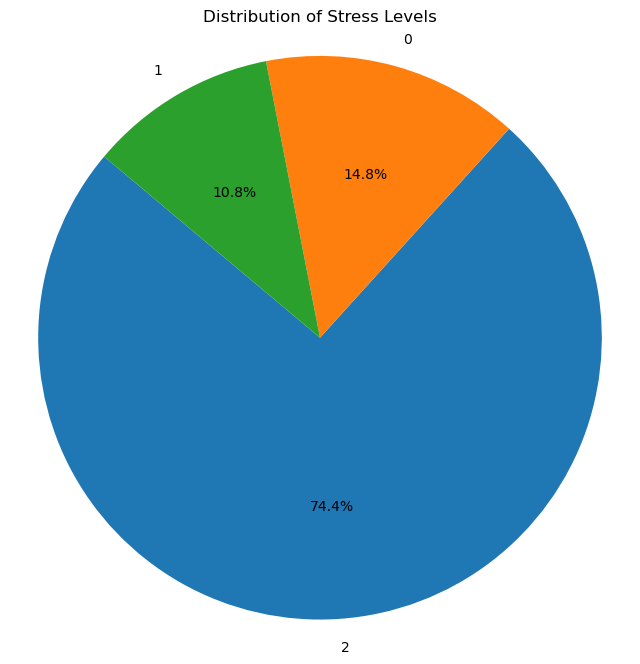

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each unique stress level
stress_level_counts = my_df['Stress level'].value_counts()

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(stress_level_counts, labels=stress_level_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Stress Levels')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Show the plot
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_1884\4207768628.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = my_df.corr()


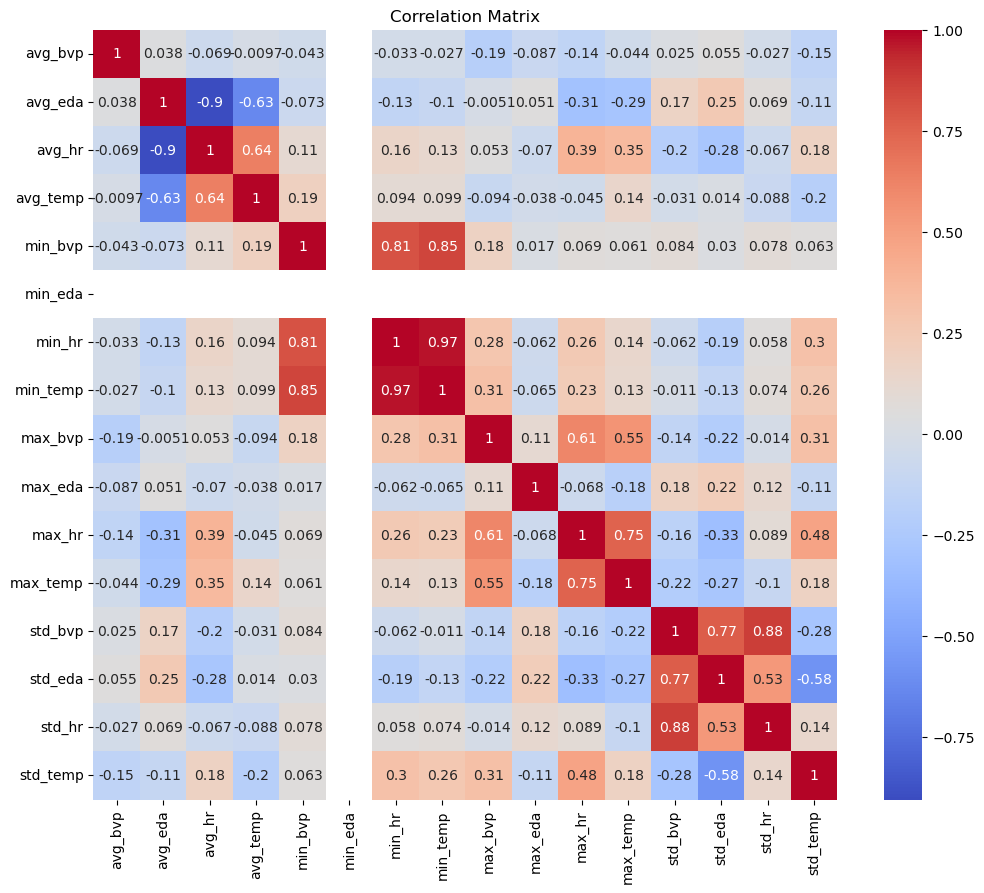

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
# Creating a correlation matrix
corr_matrix = my_df.corr()

#  the figure size
plt.figure(figsize=(12, 10))

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [28]:
import pandas as pd



# Find pairs of highly correlated features
high_corr_threshold = 0.8 
high_corr_pairs = []

for col in corr_matrix.columns:
    correlated_vars = corr_matrix.index[(corr_matrix[col] > high_corr_threshold) & (corr_matrix[col] < 1.0)]
    for correlated_var in correlated_vars:
        high_corr_pairs.append((col, correlated_var))

# Keep only one variable from each highly correlated pair
cols_to_drop = set()

for col1, col2 in high_corr_pairs:
    if col1 not in cols_to_drop:
        cols_to_drop.add(col2)

# Drop the columns with high correlation
selected_features = [col for col in my_df.columns if col not in cols_to_drop]
selected_df = my_df[selected_features]


C:\Users\Admin\AppData\Local\Temp\ipykernel_1884\3381206815.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = selected_df.corr()


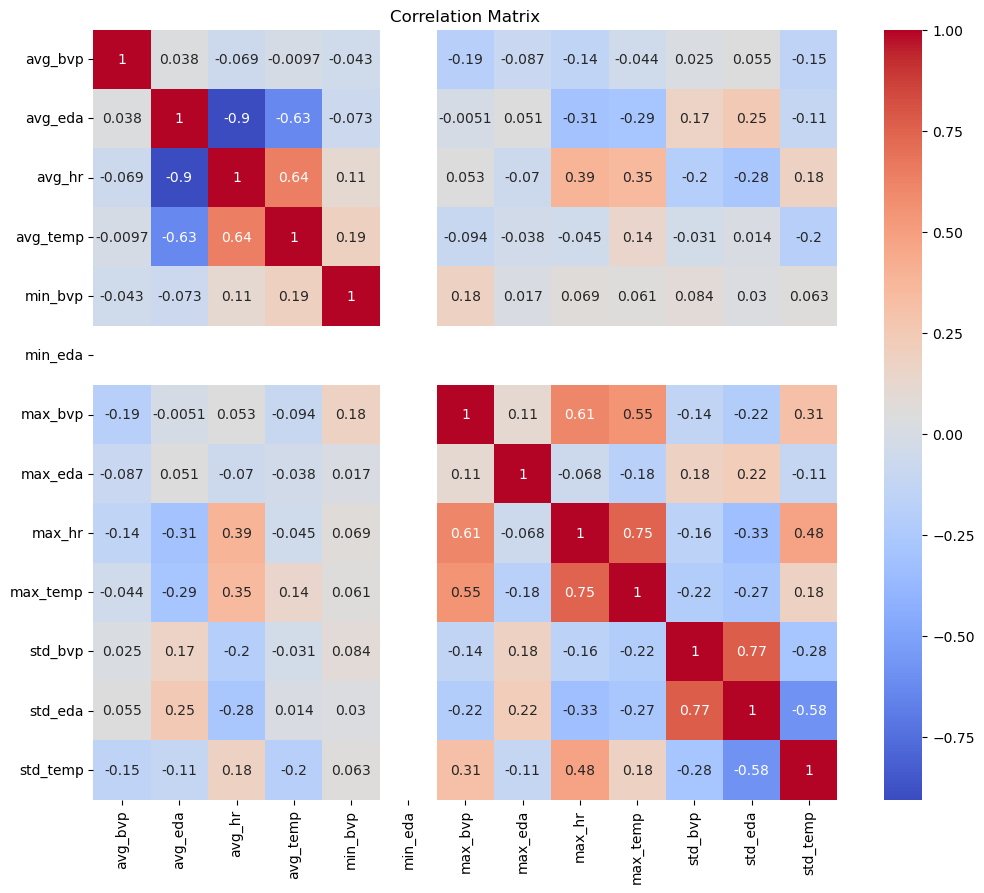

In [29]:
# Creating a correlation matrix
corr_matrix = selected_df.corr()

#  figure size
plt.figure(figsize=(12, 10))

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [30]:
selected_df = selected_df.drop(columns=['min_eda'])

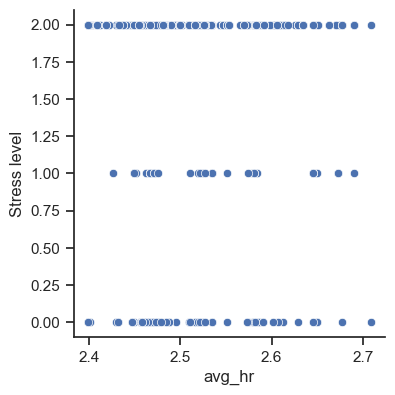

In [31]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(selected_df , x_vars=['avg_hr'], y_vars=['Stress level'], height=4)
plt.show()

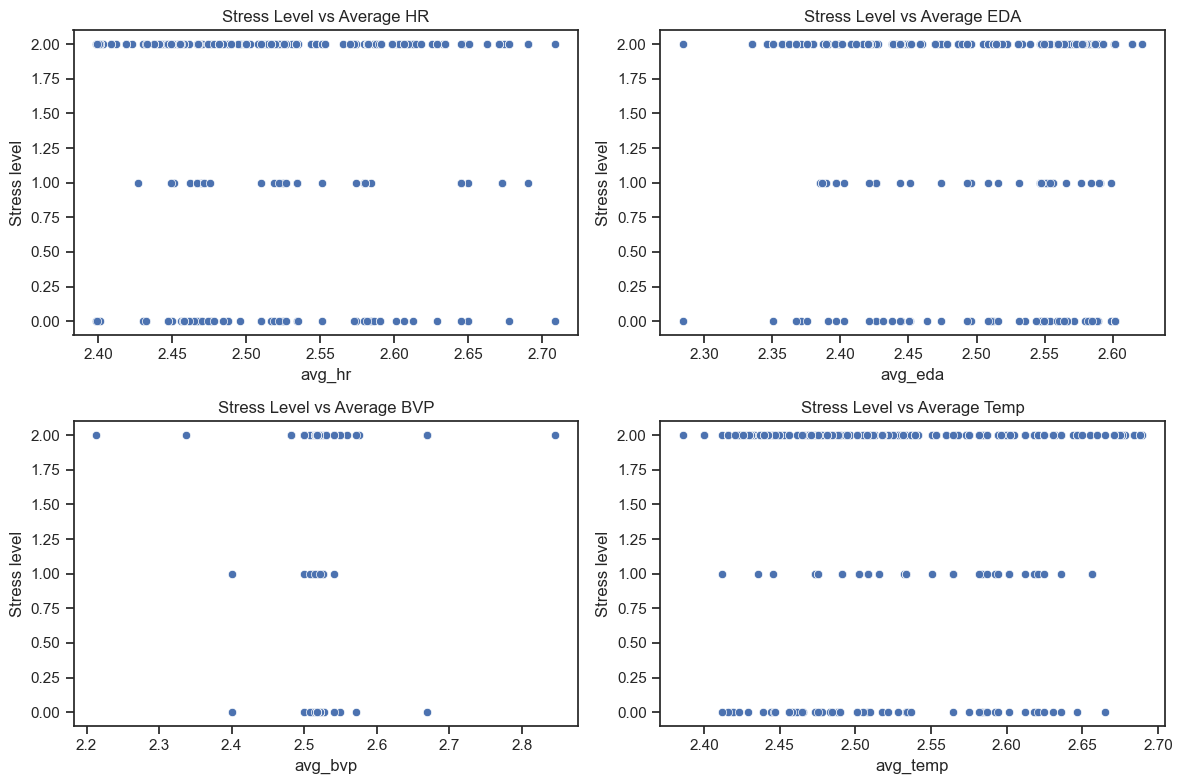

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(12, 8))

# Plotting for avg_hr
plt.subplot(2, 2, 1)
sns.scatterplot(x='avg_hr', y='Stress level', data=my_df)
plt.title('Stress Level vs Average HR')

# Plotting for avg_eda
plt.subplot(2, 2, 2)
sns.scatterplot(x='avg_eda', y='Stress level', data=my_df)
plt.title('Stress Level vs Average EDA')

# Plotting for avg_bvp
plt.subplot(2, 2, 3)
sns.scatterplot(x='avg_bvp', y='Stress level', data=my_df)
plt.title('Stress Level vs Average BVP')

# Plotting for avg_temp
plt.subplot(2, 2, 4)
sns.scatterplot(x='avg_temp', y='Stress level', data=my_df)
plt.title('Stress Level vs Average Temp')

plt.tight_layout()
plt.show()


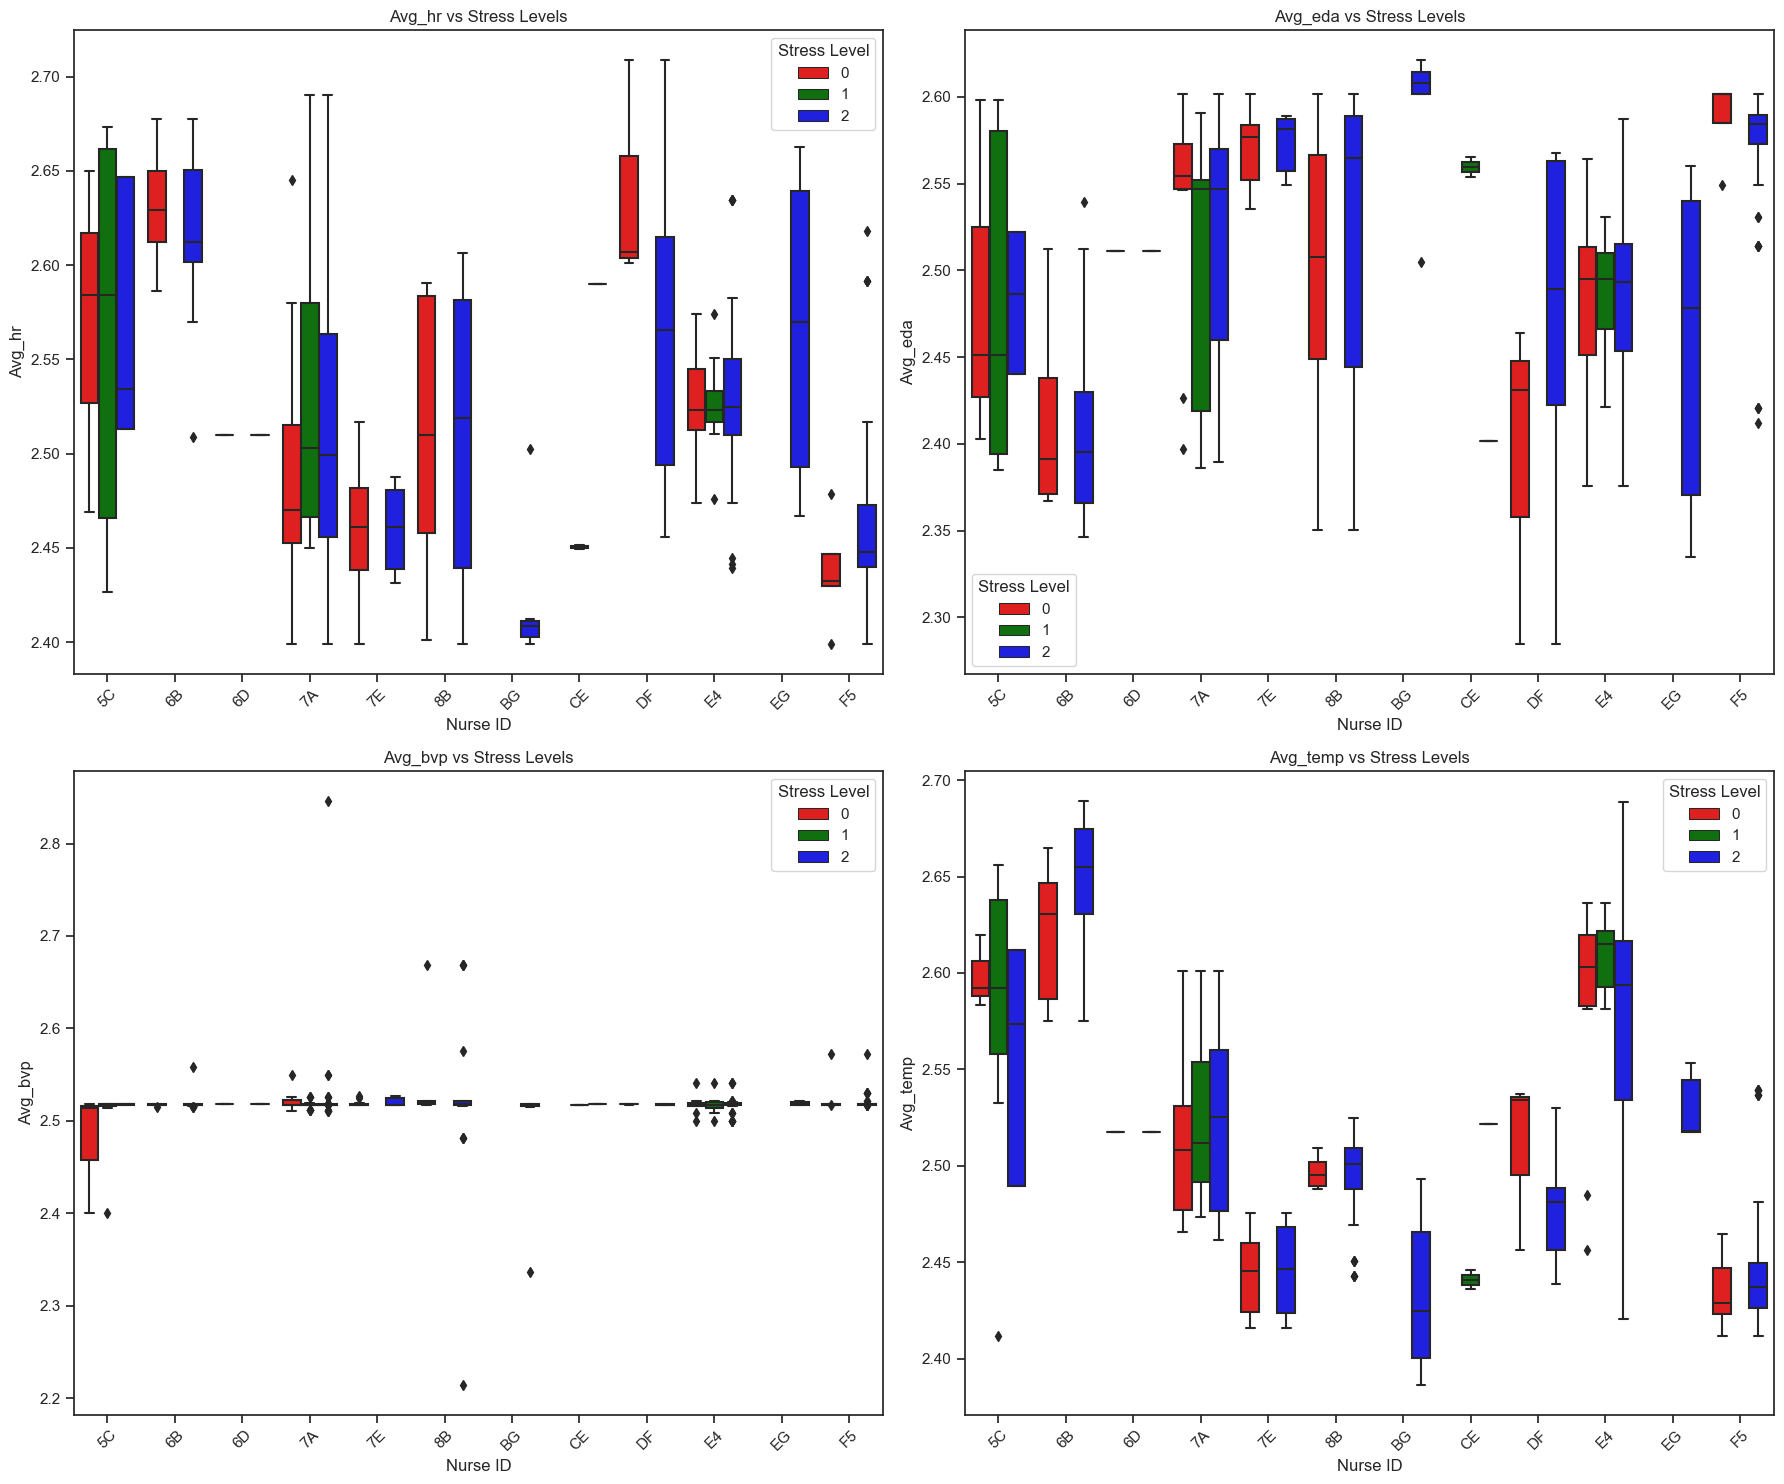

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(18, 15))  # Adjust figure size for more subplots

# Create a custom color palette for stress levels
stress_palette = {0: "red", 1: "green", 2: "blue"} 

# Group the data by ID and Stress level
grouped = my_df.groupby(['ID', 'Stress level'])

# Get a list of all nurse IDs
all_nurse_ids = my_df['ID'].unique()

# Iterate through each feature and create a subplot for each
features = ['avg_hr', 'avg_eda',  'avg_bvp', 'avg_temp']
num_features = len(features)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_features + 1) // num_cols  # Calculate the number of rows needed

for idx, feature in enumerate(features, start=1):
    plt.subplot(num_rows, num_cols, idx)  
    sns.boxplot(x='ID', y=feature, data=selected_df, hue='Stress level', palette=stress_palette)
    plt.title(f'{feature.capitalize()} vs Stress Levels')
    plt.xlabel('Nurse ID')
    plt.ylabel(feature.capitalize())
    plt.xticks(rotation=45)
    plt.legend(title='Stress Level')

    # Set x-axis ticks to include all nurse IDs
    plt.xticks(range(len(all_nurse_ids)), all_nurse_ids)

# Adjust spacing and layout
plt.tight_layout()

# Show the plot
plt.show()


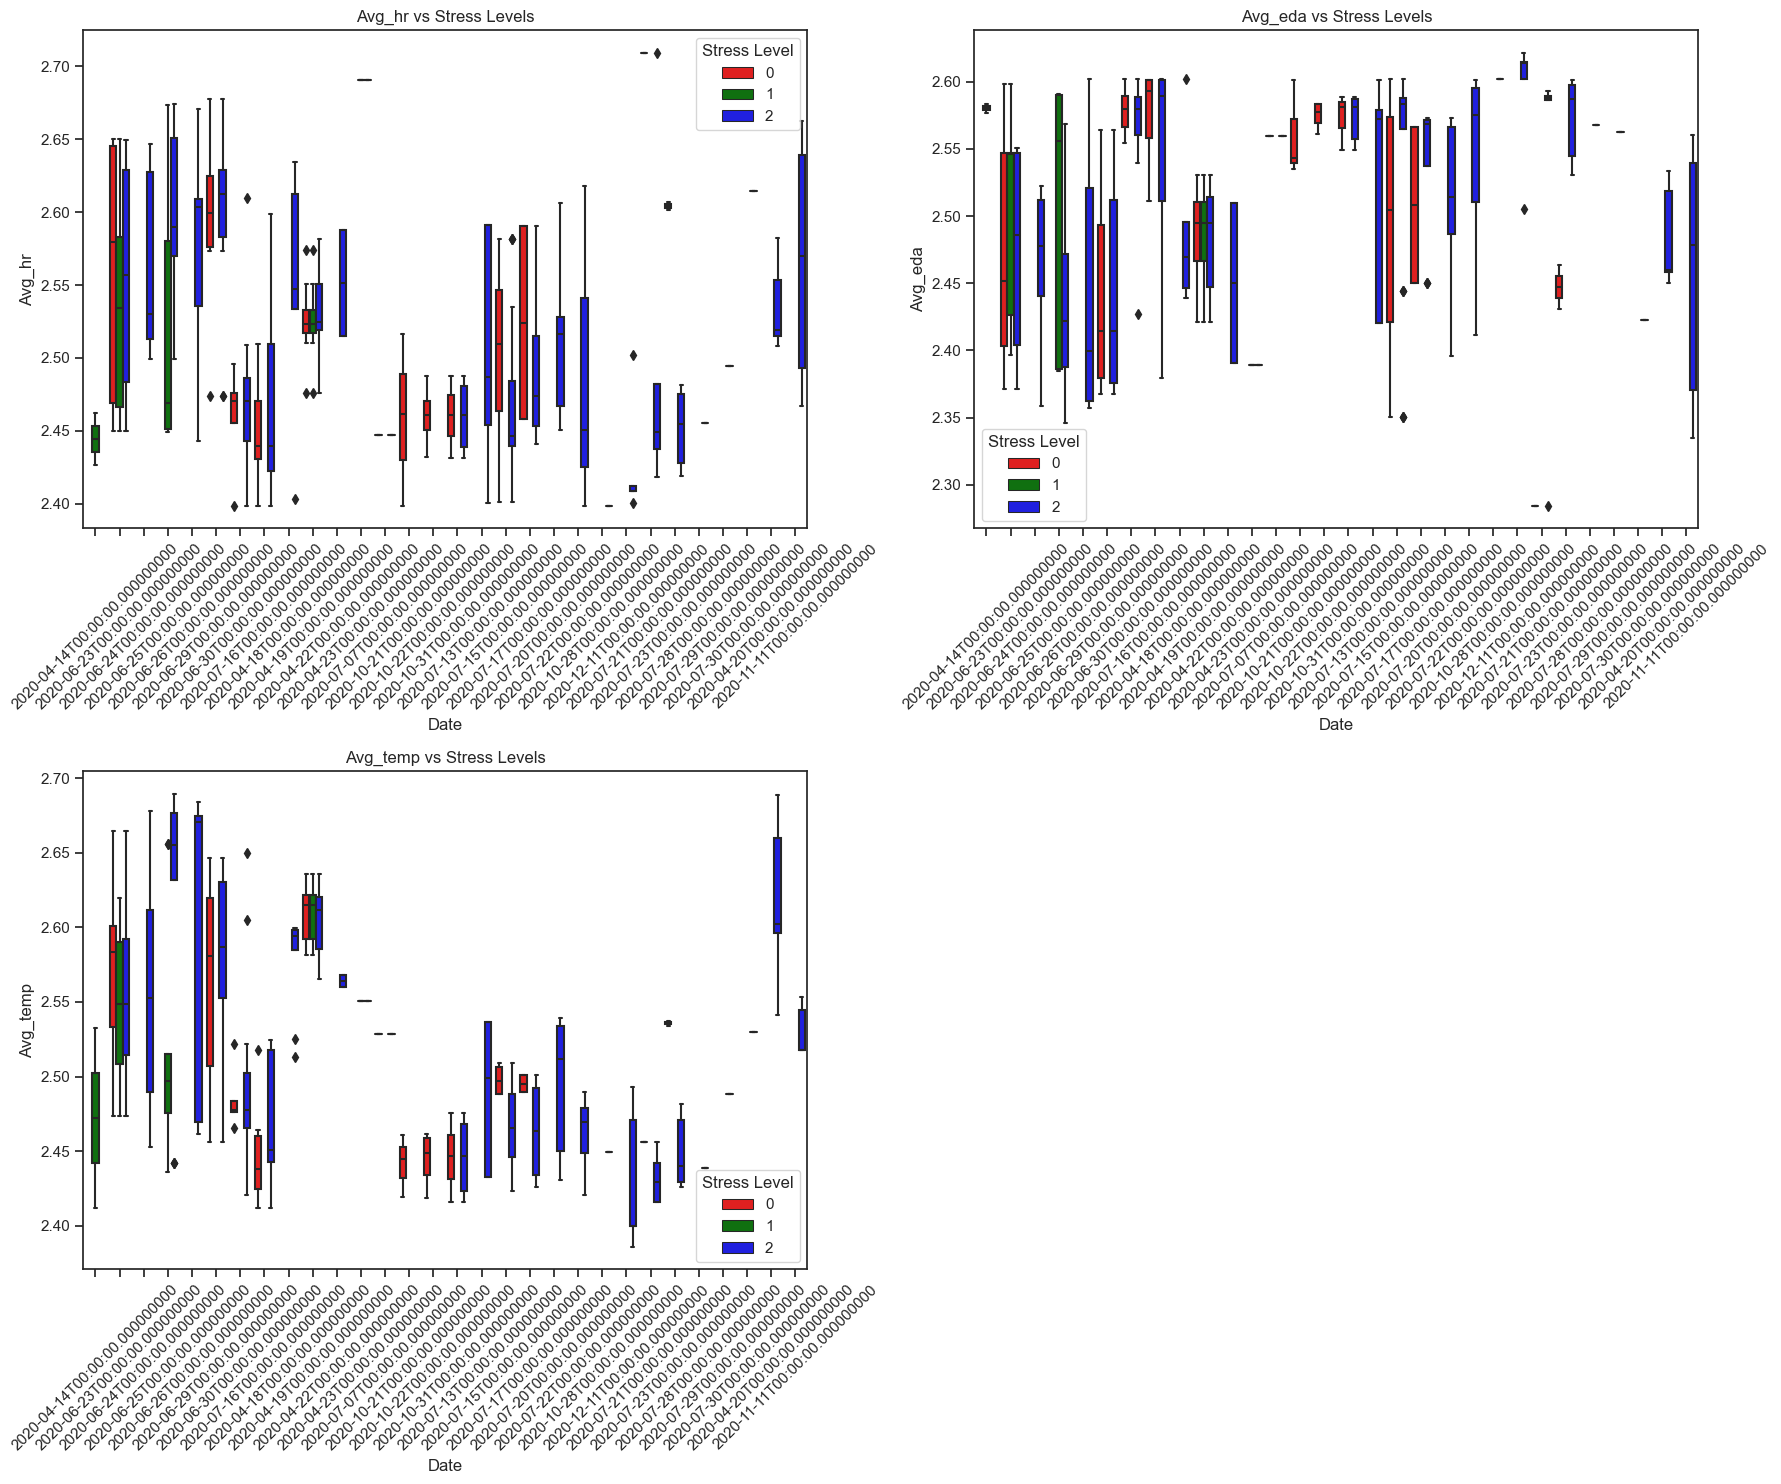

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(18, 15))  # Adjust figure size for more subplots

# Create a custom color palette for stress levels
stress_palette = {0: "red", 1: "green", 2: "blue"}  

# Group the data by Date and Stress level
grouped = my_df.groupby(['date', 'Stress level'])

# Get a list of all unique dates
all_dates = my_df['date'].unique()

# Iterate through each feature and create a subplot for each
features = ['avg_hr', 'avg_eda', 'avg_temp']
num_features = len(features)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_features + 1) // num_cols  # Calculate the number of rows needed

for idx, feature in enumerate(features, start=1):
    plt.subplot(num_rows, num_cols, idx)  
    sns.boxplot(x='date', y=feature, data=selected_df, hue='Stress level', palette=stress_palette)
    plt.title(f'{feature.capitalize()} vs Stress Levels')
    plt.xlabel('Date')
    plt.ylabel(feature.capitalize())
    plt.xticks(rotation=45)
    plt.legend(title='Stress Level')

    # Set x-axis ticks to include all unique dates
    plt.xticks(range(len(all_dates)), all_dates)

# Adjust spacing and layout
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
selected_df

,avg_bvp,avg_eda,avg_hr,avg_temp,min_bvp,max_bvp,max_eda,max_hr,max_temp,std_bvp,std_eda,std_temp,date,ID,Stress level
0,2.517694,2.583734,2.426777,2.532457,2.475766,2.507460,2.692341,2.495325,2.447325,2.518732,2.569078,2.423279,2020-04-14,5C,1
1,2.517595,2.577046,2.462090,2.411721,2.627552,2.578183,2.470600,2.536079,2.530406,2.610576,2.560083,2.569807,2020-04-14,5C,1
20,2.400530,2.598387,2.469244,2.592366,2.469963,2.425179,2.476818,2.378391,2.392379,2.329988,2.367916,2.693852,2020-06-23,5C,1
21,2.400530,2.598387,2.469244,2.592366,2.469963,2.425179,2.476818,2.378391,2.392379,2.329988,2.367916,2.693852,2020-06-23,5C,0
23,2.514047,2.451372,2.649829,2.619545,2.472614,2.431286,2.552367,2.414837,2.473737,2.443747,2.390115,2.492485,2020-06-23,5C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,2.521141,2.601298,2.418833,2.481373,2.469012,2.427058,2.418493,2.406305,2.508639,2.591407,2.622684,2.422188,2020-07-23,F5,2
922,2.517600,2.530482,2.454951,2.439803,2.490173,2.511798,2.581817,2.612290,2.514225,2.557587,2.517162,2.604926,2020-07-23,F5,2
923,2.517600,2.530482,2.454951,2.439803,2.490173,2.511798,2.581817,2.612290,2.514225,2.557587,2.517162,2.604926,2020-07-23,F5,2
924,2.517577,2.587005,2.481644,2.425940,2.481771,2.588458,2.579023,2.516048,2.495438,2.595617,2.550095,2.552927,2020-07-23,F5,2


In [37]:
# Drop the specified columns
columns_drop = ['min_bvp','max_bvp','avg_bvp', 'max_eda', 'max_hr',  'max_temp','std_bvp','std_eda','std_temp','date', 'ID']
final_df = selected_df.drop(columns=columns_drop)

In [38]:
final_df

,avg_eda,avg_hr,avg_temp,Stress level
0,2.583734,2.426777,2.532457,1
1,2.577046,2.462090,2.411721,1
20,2.598387,2.469244,2.592366,1
21,2.598387,2.469244,2.592366,0
23,2.451372,2.649829,2.619545,1
...,...,...,...,...
921,2.601298,2.418833,2.481373,2
922,2.530482,2.454951,2.439803,2
923,2.530482,2.454951,2.439803,2
924,2.587005,2.481644,2.425940,2


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler


from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
final_df['Stress level'] = label_encoder.fit_transform(final_df['Stress level'])

# Split data into features (X) and target variable (y)
X = final_df[['avg_hr']].values
y = final_df['Stress level'].values

# Normalize feature data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.6842105263157895
Confusion Matrix:
 [[ 0  4  7]
 [ 1  4  5]
 [ 3  4 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.33      0.40      0.36        10
           2       0.80      0.87      0.83        55

    accuracy                           0.68        76
   macro avg       0.38      0.42      0.40        76
weighted avg       0.62      0.68      0.65        76



In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


# Split data into features (X) and target variable (y)
X = final_df[['avg_eda', 'avg_hr' ,'avg_temp']].values
y = final_df['Stress level'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7236842105263158
Confusion Matrix:
 [[ 0  0 11]
 [ 0  0 10]
 [ 0  0 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        10
           2       0.72      1.00      0.84        55

    accuracy                           0.72        76
   macro avg       0.24      0.33      0.28        76
weighted avg       0.52      0.72      0.61        76



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
